# SHAP Analysis 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

import ml
import utils
from analysis import SHAPAnalyzer

In [2]:
andror_df_all = pd.read_csv("../andror_df_all_clusters.csv", index_col=0)
# andror_df_all = utils.add_fingerprints_to_df(andror_df_all)

# Fingerprints

In [4]:
splits_065, pipelines_065 = ml.run_or_retrieve_from_disc(
    # X=andror_df_all[utils.FP_COLUMNS], 
    X=[],
    y=andror_df_all["final class"], 
    groups=andror_df_all["cluster_065"], 
    training_name="tanimoto_065",
)

In [5]:
splits_065_catboost, pipelines_065_catboost = ml.run_or_retrieve_from_disc(
    # X=andror_df_all[utils.FP_COLUMNS], 
    X=[],
    y=andror_df_all["final class"], 
    groups=andror_df_all["cluster_065"], 
    training_name="tanimoto_065",
    folder="catboost_results"
)

In [29]:
fingerprint_SHAP = SHAPAnalyzer(splits_065, pipelines_065, andror_df_all[utils.FP_COLUMNS])

100%|██████████| 25/25 [01:00<00:00,  2.42s/it]


In [8]:
fingerprint_SHAP_catboost = SHAPAnalyzer(splits_065_catboost, pipelines_065_catboost, andror_df_all[utils.FP_COLUMNS])

100%|██████████| 25/25 [05:41<00:00, 13.65s/it]


In [30]:
fingerprint_SHAP_comparison = pd.DataFrame({"catboost": fingerprint_SHAP_catboost.mean_shap_values, "GBT": fingerprint_SHAP.mean_shap_values})

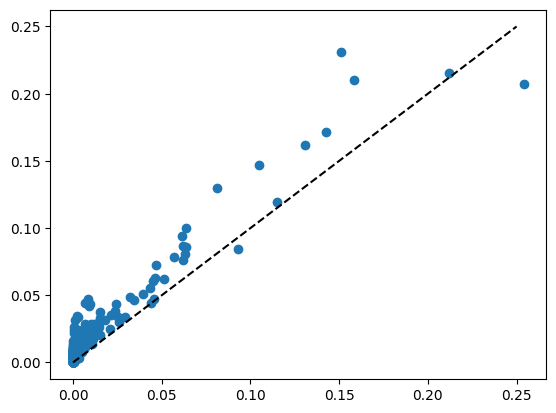

In [23]:
plt.scatter(fingerprint_SHAP["GBT"], fingerprint_SHAP["catboost"])
plt.plot([0, 0.25], [0, 0.25], c="k", linestyle="--")

Text(0.5, 0, 'fingerprint (sorted by GBT SHAP value)')

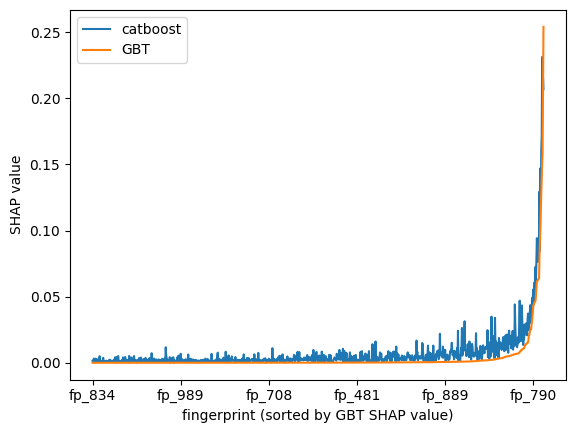

In [22]:
fingerprint_SHAP.sort_values(by="GBT").plot()
plt.ylabel("SHAP value")
plt.xlabel("fingerprint (sorted by GBT SHAP value)")

# RDKit Descriptors

In [5]:
rdkit_descriptors = pd.read_csv("../rdkit_descriptors.csv")

In [6]:
splits_rdkit_descriptors, pipelines_rdkit_descriptors = ml.run_or_retrieve_from_disc(
    X=rdkit_descriptors, 
    y=andror_df_all["final class"], 
    groups=andror_df_all["cluster_065"], 
    training_name="RDKit_descriptors",
)

In [7]:
splits_rdkit_descriptors_catboost, pipelines_rdkit_descriptors_catboost = ml.run_or_retrieve_from_disc(
    X=rdkit_descriptors, 
    y=andror_df_all["final class"], 
    groups=andror_df_all["cluster_065"], 
    training_name="RDKit_descriptors",
    folder="catboost_results",
)

In [8]:
rdkit_SHAP = SHAPAnalyzer(splits_rdkit_descriptors, pipelines_rdkit_descriptors, rdkit_descriptors)

100%|██████████| 25/25 [01:06<00:00,  2.65s/it]


In [36]:
rdkit_SHAP_catboost = SHAPAnalyzer(splits_rdkit_descriptors_catboost, pipelines_rdkit_descriptors_catboost, rdkit_descriptors)

100%|██████████| 25/25 [03:26<00:00,  8.27s/it]


In [37]:
rdkit_SHAP_comparison = pd.DataFrame({"catboost": rdkit_SHAP_catboost.mean_shap_values, "GBT": rdkit_SHAP.mean_shap_values})

Text(0.5, 0, 'fingerprint (sorted by GBT SHAP value)')

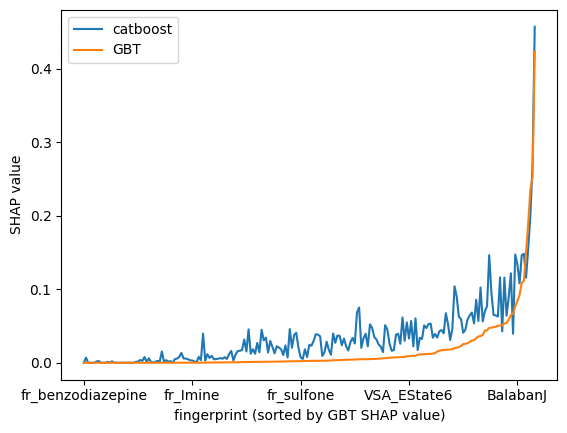

In [38]:
rdkit_SHAP_comparison.sort_values(by="GBT").plot()
plt.ylabel("SHAP value")
plt.xlabel("fingerprint (sorted by GBT SHAP value)")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


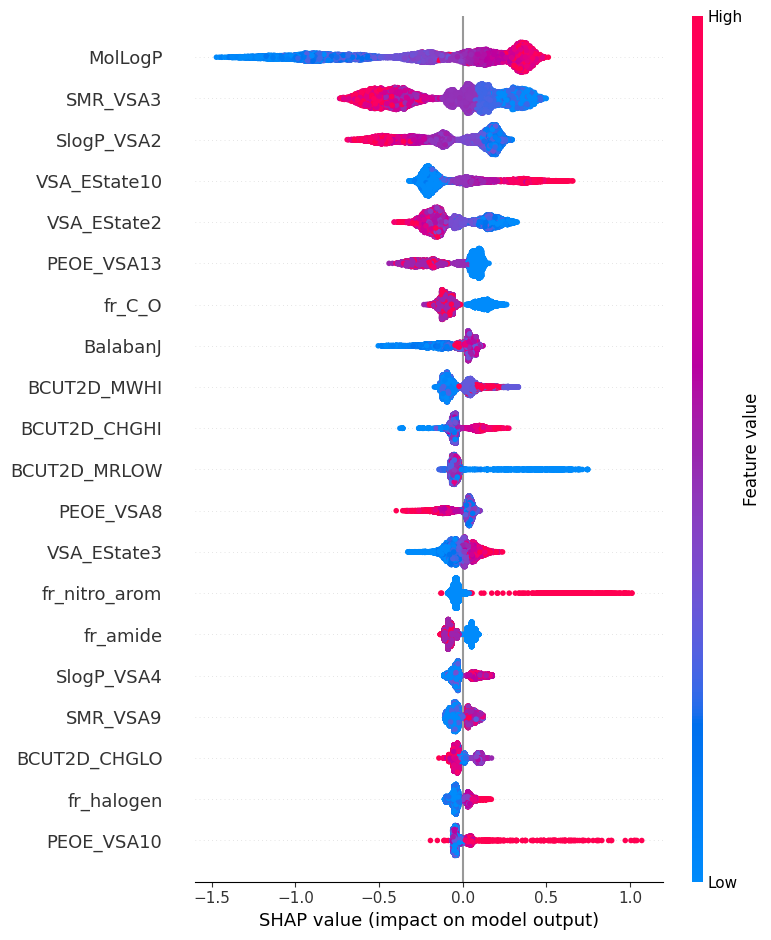

In [10]:
rdkit_SHAP.plot_shap_values(fold_index=0)